# LAB 1. LINEAR TRANSFORMATIONS

**GitHub link:** https://github.com/tmazko/Python_Labs_Applied_LA/tree/master/Lab_1

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Part 1: 2D Transformations on Lynx Graph

**Task:** Apply stretch, shear, reflection, and rotation transformations to a 2D object (lynx) and analyze how each transformation changes the object. Compare the effects of applying transformations in different orders.

In [29]:
lynx = np.array([
[209.70, 368.42], [157.63, 332.16], [118.82, 284.21], [80.95, 224.56], [43.08, 244.44], [20.36, 266.67], [-4.26, 293.57], [2.37, 263.16], [-20.36, 292.40], [-39.29, 299.42], [-21.30, 259.65],
[-50.65, 267.84], [-39.29, 242.11], [-55.38, 240.94], [-100.83, 300.58], [-149.11, 345.03], [-172.78, 361.40], [-189.82, 300.58], [-192.66, 225.73], [-181.30, 145.03], [-168.05, 104.09], [-184.14, 66.67], [-186.98, 31.58], [-183.20, 3.51], [-208.76, -4.68], [-197.40, -29.24], [-182.25, -44.44], [-203.08, -43.27], [-172.78, -92.40], [-131.12, -126.32], [-101.78, -147.37], [-74.32, -163.74], [-110.30, -224.56], [-143.43, -287.72], [-161.42, -240.94], [-282.60, -221.05], [-388.64, -205.85], [-370.65, -301.75], [-339.41, -397.66], [18.46, -397.66], [345.09, -400.00], [359.29, -378.95], [367.81, -342.69], [346.98, -362.57], [363.08, -302.92], [357.40, -243.27], [348.88, -266.67], [336.57, -201.17], [290.18, -135.67], [240.00, -118.13], [258.93, -164.91], [257.99, -228.07], [252.31, -271.35], [256.09, -333.33], [247.57, -359.06], [230.53, -307.60], [194.56, -238.60], [160.47, -181.29], [120.71, -149.71], [165.21, -132.16], [201.18, -100.58], [183.20, -99.42], [221.07, -73.68], [253.25, -24.56], [222.01, -23.39], [251.36, -1.17], [262.72, 24.56], [234.32, 25.73], [214.44, 42.11], [202.13, 60.82], [220.12, 101.75], [234.32, 160.23], [240.00, 230.41], [232.43, 316.96]
])

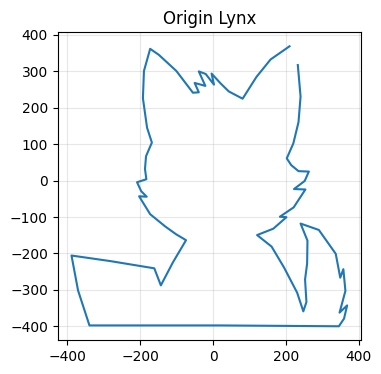

In [55]:
plt.figure(figsize=(4, 4))
plt.plot(lynx[:,0], lynx[:,1])
plt.gca().set_aspect('equal')
plt.grid(alpha=0.3)
plt.title("Origin Lynx")
plt.show()

### Task 1: Defining Linear Transformation Functions
**Stretch, Shear, Reflection, Rotation** for 2D coordinates.

In [31]:
def stretch_coords(coords, a, b):
    X = coords.copy()
    M = np.array([[a, 0],
                  [0, b]])
    return  X @ M

In [32]:
def shear_coords(coords, a, b):
    X = coords.copy()
    M = np.array([[1, a],
                  [b, 1]])
    return X @ M

In [33]:
def reflection_coords(coords, a, b):
    X = coords.copy()
    M = np.array([[a**2-b**2, 2*a*b],
                  [2*a*b, b**2-a**2]])
    M=(1/(a**2+b**2))*M
    return X @ M.T

In [34]:
def rotation_coords(coords, fi):
    X = coords.copy()
    M = np.array([[np.cos(fi), -np.sin(fi)],
                  [np.sin(fi), np.cos(fi)]])
    return X @ M.T

Apply transformations:

In [35]:
stretched_lynx=stretch_coords(lynx, 1.5, 0.7)
sheared_lynx=shear_coords(lynx, 0, 0.5)
reflected_lynx=reflection_coords(lynx, 1,1)
rotated_lynx=rotation_coords(lynx, np.pi/4)

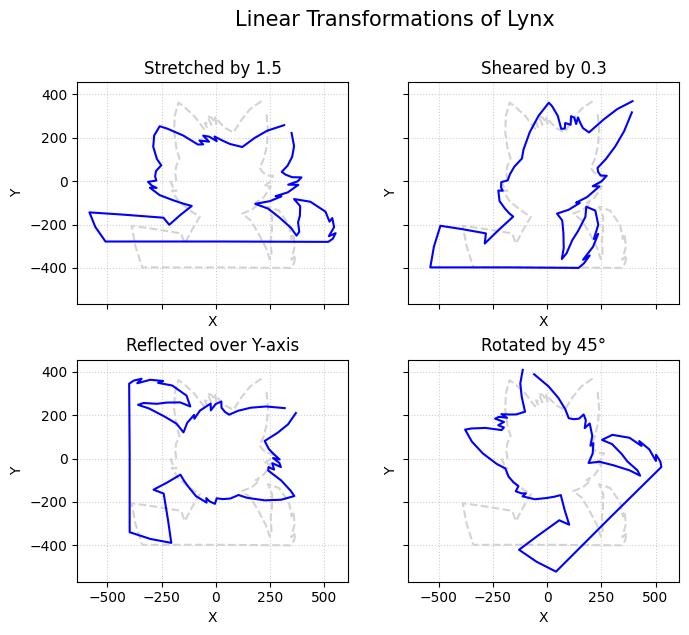

In [58]:

fig, axes = plt.subplots(2, 2, figsize=(9,7), sharex=True, sharey=True)

# --- Stretched ---
axes[0, 0].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[0, 0].plot(stretched_lynx[:, 0], stretched_lynx[:, 1], color='blue', label='Stretched lynx')
axes[0, 0].set_title('Stretched by 1.5')
axes[0, 0].set_aspect('equal')
axes[0, 0].grid(True, linestyle=':', alpha=0.6)

# --- Sheared ---
axes[0, 1].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[0, 1].plot(sheared_lynx[:, 0], sheared_lynx[:, 1], color='blue', label='Sheared lynx')
axes[0, 1].set_title('Sheared by 0.3')
axes[0, 1].set_aspect('equal')
axes[0, 1].grid(True, linestyle=':', alpha=0.6)

# --- Reflected ---
axes[1, 0].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[1, 0].plot(reflected_lynx[:, 0], reflected_lynx[:, 1], color='blue', label='Reflected lynx')
axes[1, 0].set_title('Reflected over Y-axis')
axes[1, 0].set_aspect('equal')
axes[1, 0].grid(True, linestyle=':', alpha=0.6)

# --- Rotated ---
axes[1, 1].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[1, 1].plot(rotated_lynx[:, 0], rotated_lynx[:, 1], color='blue', label='Rotated lynx')
axes[1, 1].set_title('Rotated by 45°')
axes[1, 1].set_aspect('equal')
axes[1, 1].grid(True, linestyle=':', alpha=0.6)

for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.suptitle('Linear Transformations of Lynx', fontsize=15, y=0.9, x=0.45)  # зменшена відстань
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
})

plt.tight_layout(rect=[0, 0, 0.8, 0.9])
plt.subplots_adjust(hspace=0.25)
plt.show()


**Conclusion:**
* stretching elongates/compresses axes
* shearing skews shape
* reflection mirrors across an axis
* rotation spins object around origin


### Task 2: Combination of Transformations & Order Dependence

In [37]:
stretch_sher_rotation=stretch_coords(lynx, 1.5, 0.7)
stretch_sher_rotation=shear_coords(stretch_sher_rotation, 0, 0.5)
stretch_sher_rotation=rotation_coords(stretch_sher_rotation, np.pi/4)

In [38]:
sher_stretch_rotation=shear_coords(lynx, 0, 0.5)
sher_stretch_rotation=stretch_coords(sher_stretch_rotation, 1.5, 0.7)
sher_stretch_rotation=rotation_coords(sher_stretch_rotation, np.pi/4)

In [39]:
rotation_sher_stretch=rotation_coords(lynx, np.pi/4)
rotation_sher_stretch=shear_coords(rotation_sher_stretch, 0, 0.5)
rotation_sher_stretch=stretch_coords(rotation_sher_stretch, 1.5, 0.7)


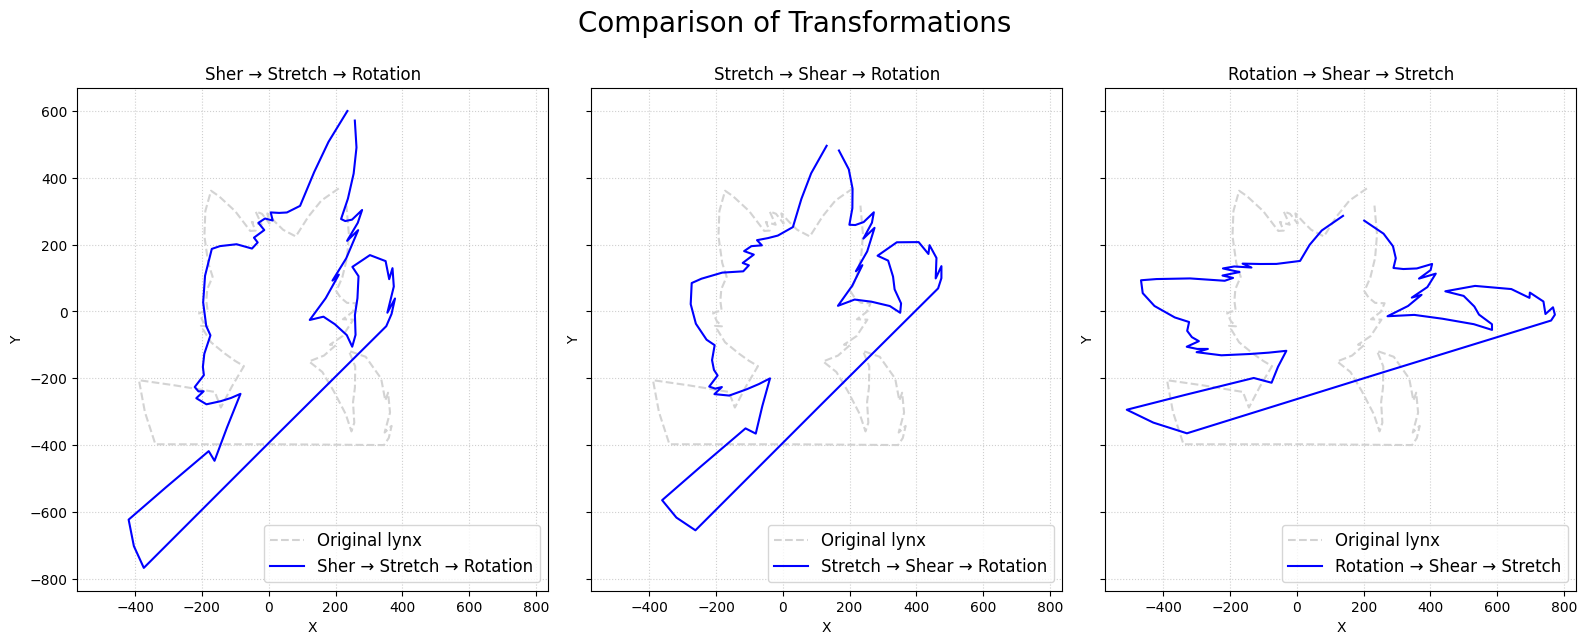

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# --- 1. Sher -> Stretch -> Rotation ---
axes[0].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[0].plot(sher_stretch_rotation[:, 0], sher_stretch_rotation[:, 1],
             color='blue', label='Sher → Stretch → Rotation')
axes[0].set_title('Sher → Stretch → Rotation')
axes[0].set_aspect('equal')
axes[0].legend()

# --- Stretch -> Shear -> Rotation ---
axes[1].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[1].plot(stretch_sher_rotation[:, 0], stretch_sher_rotation[:, 1],
             color='blue', label='Stretch → Shear → Rotation')
axes[1].set_title('Stretch → Shear → Rotation')
axes[1].set_aspect('equal')
axes[1].legend()

# --- Rotation -> Shear -> Stretch ---
axes[2].plot(lynx[:, 0], lynx[:, 1], color='lightgray', linestyle='--', label='Original lynx')
axes[2].plot(rotation_sher_stretch[:, 0], rotation_sher_stretch[:, 1],
             color='blue', label='Rotation → Shear → Stretch')
axes[2].set_title('Rotation → Shear → Stretch')
axes[2].set_aspect('equal')
axes[2].legend()

for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend( loc='lower right', bbox_to_anchor=(1, 0), fontsize=12
    )

plt.suptitle('Comparison of Transformations', fontsize=20, y=1.02)
plt.tight_layout()
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
})
plt.show()


**Conclusion:**

Linear transformations are not generally commutative. The final result depends on the order.

## Part 2: 3D Rotations on ModelNet Object

In [41]:
df= pd.read_csv("3D_objects.csv")
print(df.columns)

Index(['object_id', 'class', 'split', 'object_path'], dtype='object')


In [42]:
print(df["class"].unique())

['airplane' 'bathtub' 'bed' 'bench' 'bookshelf' 'bottle' 'bowl' 'car'
 'chair' 'cone' 'cup' 'curtain' 'desk' 'door' 'dresser' 'flower' 'glass'
 'guitar' 'keyboard' 'lamp' 'laptop' 'mantel' 'monitor' 'night' 'person'
 'piano' 'plant' 'radio' 'range' 'sink' 'sofa' 'stairs' 'stool' 'table'
 'tent' 'toilet' 'tv' 'vase' 'wardrobe' 'xbox']


In [43]:
def read_off(filename: str):
    with open(filename, 'r') as f:
        # Перевіряємо, чи перший рядок починається з OFF
        if 'OFF' != f.readline().strip():
            raise ValueError('Not a valid OFF header')

        # Зчитуємо кількість вершин, граней та ребер (третє значення часто ігнорується)
        n_verts, n_faces, _ = map(int, f.readline().strip().split())

        # Зчитуємо координати всіх вершин (x, y, z)
        verts = [list(map(float, f.readline().strip().split())) for _ in range(n_verts)]

        # Зчитуємо грані: перше число у рядку – кількість вершин грані (ігноруємо),
        # далі індекси
        faces = [list(map(int, f.readline().strip().split()[1:])) for _ in range(n_faces)]

        # Повертаємо вершини у вигляді масиву NumPy та список граней
        return np.array(verts), faces

In [44]:

# Функція для візуалізації OFF-моделі у вигляді сітки та точок
# (зручно бачити, як змінюється модель після трансформацій)
def plot_off(vertices, faces):
    fig = plt.figure(figsize=(8, 8))                  # створюємо вікно
    ax = fig.add_subplot(111, projection='3d')        # додаємо 3D координатну систему

    # Створюємо полігональну сітку з граней (faces) та додаємо її на графік
    mesh = Poly3DCollection([vertices[face] for face in faces],
                            alpha=0.3, edgecolor='k') # прозорість 0.3, чорні ребра

    ax.add_collection3d(mesh)

    # Додаємо вершини як червоні точки
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=2, c='r')

    # Підписуємо осі
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'figure.titlesize': 'large'
})
    plt.show()


In [45]:
object = df[df["class"] == "piano"]
path = object.iloc[0]["object_path"]

vertices, faces = read_off(path)

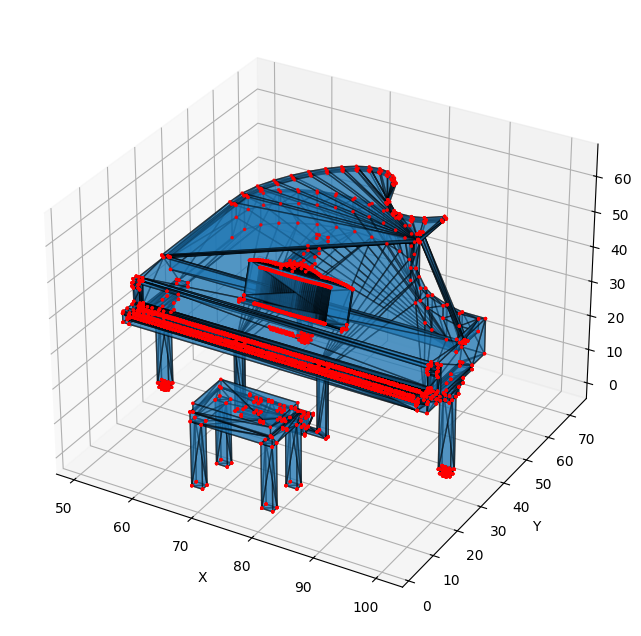

In [54]:
plot_off(vertices, faces)

### Task 3: Write a function for each type of linear transformation. Apply 3D rotations around XY, YZ, XZ planes.

**Functions** for 3D rotations:

In [47]:
def rotate_xy (X, fi ):
    M = np.array([[np.cos(fi), -np.sin(fi),0],
                  [np.sin(fi), np.cos(fi), 0],
                  [0,0,1]])
    return X @ M

def rotate_yz (X, fi ):
    M = np.array([[1,0,0],
                  [0,np.cos(fi), -np.sin(fi)],
                  [0, np.sin(fi), np.cos(fi)]])
    return X @ M

def rotate_xz (X, fi ):
    M = np.array([[np.cos(fi),0,-np.sin(fi)],
                  [0,1, 0],
                  [np.sin(fi), 0, np.cos(fi)]])
    return X @ M


Rotate the object **around the Z-axis (XY plane rotation)** by 45 degree:

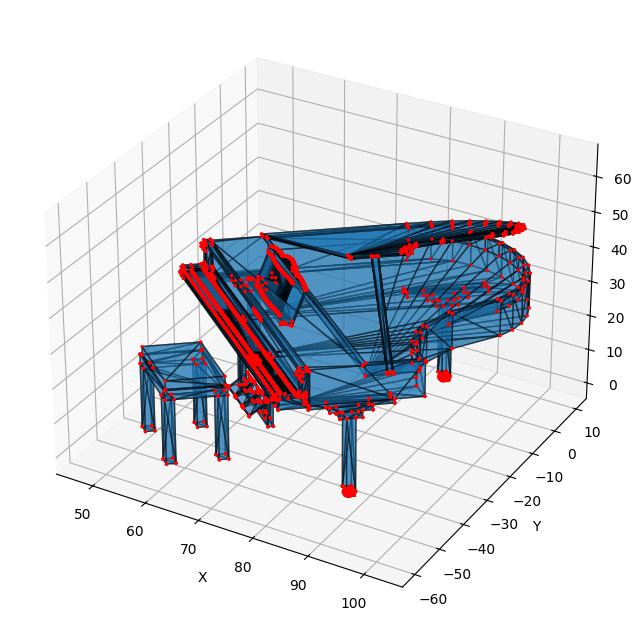

In [48]:
rotated_xy_vertices=rotate_xy(vertices, np.pi/4)
plot_off(rotated_xy_vertices, faces)

Rotate the object **around the X-axis (YZ plane rotation)** by 45 degrees:

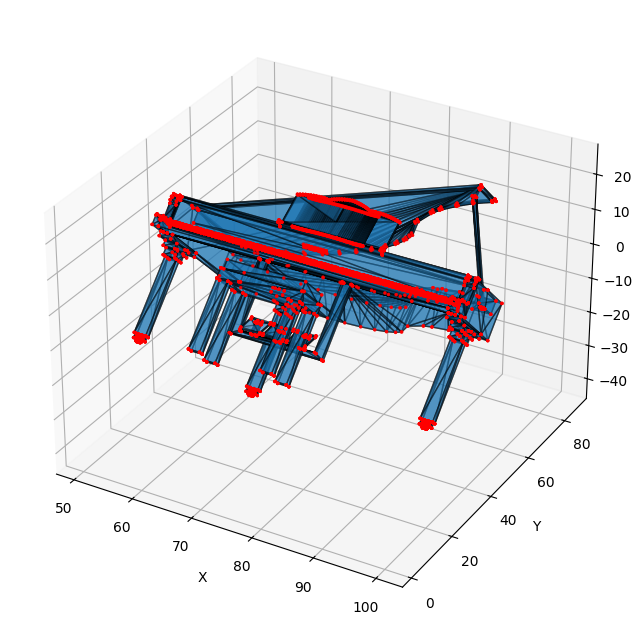

In [49]:
rotated_yz_vertices=rotate_yz(vertices, np.pi/4)
plot_off(rotated_yz_vertices, faces)

Rotate the object **around the Y-axis (XZ plane rotation)** by 45 degrees:

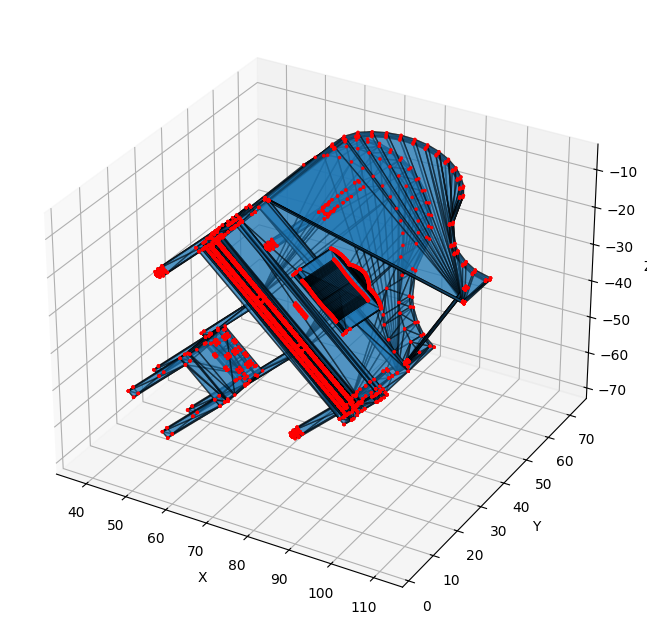

In [50]:
rotated_xz_vertices=rotate_xz(vertices, np.pi/4)
plot_off(rotated_xz_vertices, faces)

### Task 4: Applying a combination of Stretch, Sher and Rotation

**Combination 1:**  xz -> yz -> xy

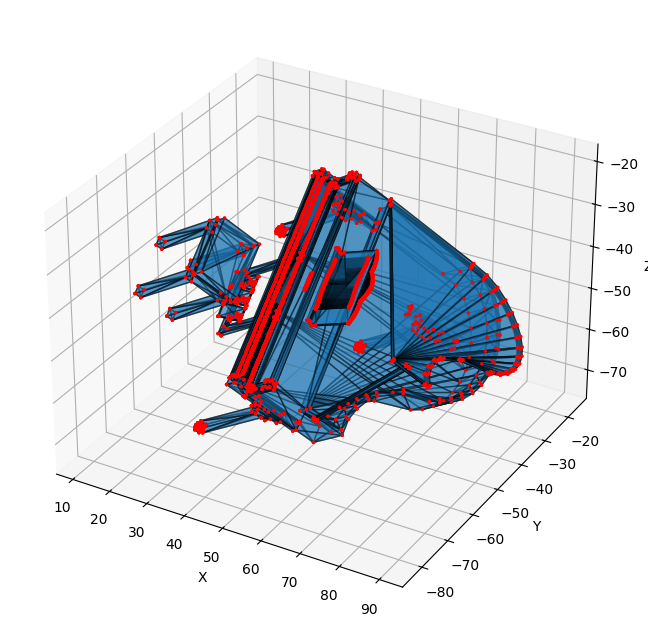

In [51]:
rotated_xz_yz_xy=rotate_xz(vertices, np.pi/4)
rotated_xz_yz_xy=rotate_yz(rotated_xz_yz_xy, np.pi/4)
rotated_xz_yz_xy=rotate_xy(rotated_xz_yz_xy, np.pi/4)
plot_off(rotated_xz_yz_xy, faces)

**Combination 2:**  xy -> xz -> yz

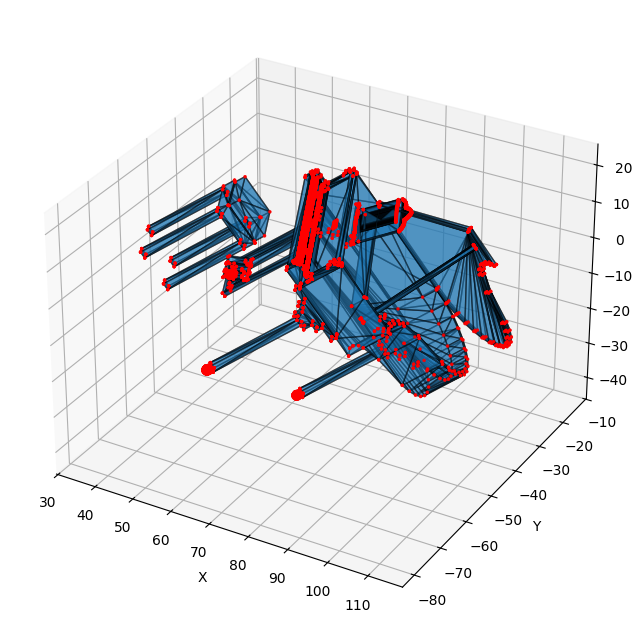

In [52]:
rotated_xy_xz_yz=rotate_xy(vertices, np.pi/4)
rotated_xy_xz_yz=rotate_xz(rotated_xy_xz_yz, np.pi/4)
rotated_xy_xz_yz=rotate_yz(rotated_xy_xz_yz, np.pi/4)

plot_off(rotated_xy_xz_yz, faces)

**Combination 3:**  yz -> xy -> xz

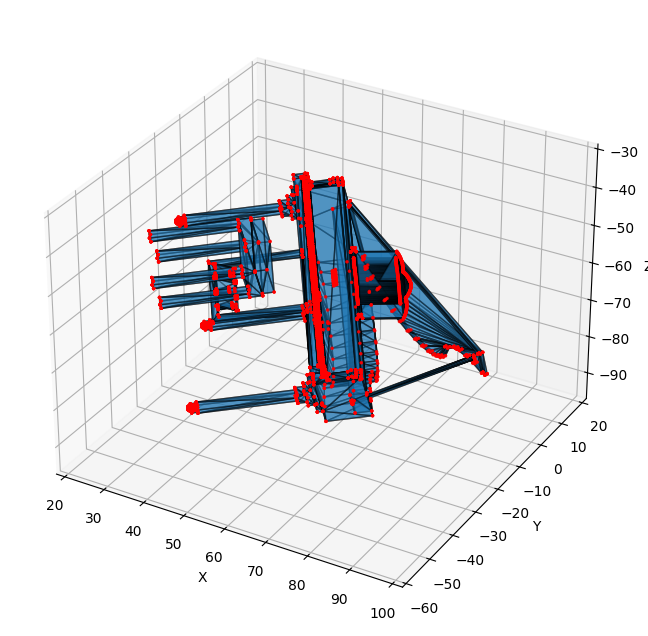

In [53]:
rotated_yz_xy_xz=rotate_yz(vertices, np.pi/4)
rotated_yz_xy_xz=rotate_xy(rotated_yz_xy_xz, np.pi/4)
rotated_yz_xy_xz=rotate_xz(rotated_yz_xy_xz, np.pi/4)

plot_off(rotated_yz_xy_xz, faces)

**Conclusions 3D:**
 - Rotations preserve shape but change orientation.
 - The order of rotations affects the final orientation.
 - Rotation matrices are orthogonal with determinant = 1, preserving volume.
 - Combining rotations demonstrates non-commutativity of 3D linear transformations.